## Observations and Insights 

1) For the Capomulin drug regimen, the tumor size and mouse weight have a very strong linear relationship.
2) For Mouse m601, the Capomulin drug regimen was very effective in reducing the tumor size over the time of the study.
3) The Capomulin and Ramicane regimens seemed to be more effective than the Infubinol and Ceftamin regimens becuase the final tumor volume was much lower.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse = study_results.merge(mouse_metadata, on="Mouse ID", how="inner")
# Display the data table for preview
combined_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [32]:
combined_mouse.shape

(1893, 8)

In [33]:
combined_mouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [34]:
combined_mouse.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [35]:
# Checking the number of mice.
len(combined_mouse)

1893

In [36]:
combined_mouse['Mouse ID'].value_counts()

g989    13
c758    10
p189    10
l509    10
j984    10
        ..
f932     1
x226     1
b447     1
d133     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [37]:
combined_mouse["Mouse ID"].nunique()

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
sum(combined_mouse.duplicated(subset=["Mouse ID","Timepoint"]))

5

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
mask =combined_mouse.duplicated(subset=["Mouse ID","Timepoint"])
combined_mouse.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [40]:
combined_mouse.iloc[860:873,:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask2 = combined_mouse["Mouse ID"] != "g989"
clean = combined_mouse.loc[mask2].reset_index(drop=True)
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [42]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

248

In [43]:
clean.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drugs = clean.groupby("Drug Regimen")
regimen_count = clean.groupby("Drug Regimen").size()
tumor_average = drugs["Tumor Volume (mm3)"].mean()
tumor_median = drugs["Tumor Volume (mm3)"].median()
tumor_variance = drugs["Tumor Volume (mm3)"].var()
tumor_std = drugs["Tumor Volume (mm3)"].std()
tumor_sem = drugs["Tumor Volume (mm3)"].sem()

#Creates summary table
drug_summary = pd.DataFrame()
drug_summary["Number of Samples"] = regimen_count
drug_summary["Average Tumor Volume"] = tumor_average
drug_summary["Median Tumor Volume"] = tumor_median
drug_summary["Variance of Tumor Volume"] = tumor_variance
drug_summary["Standard Deviation of Tumor Volume"] = tumor_std
drug_summary["Standard Error of Tumor Volume"] = tumor_sem

drug_summary



,Number of Samples,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Tumor Volume
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drugs["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

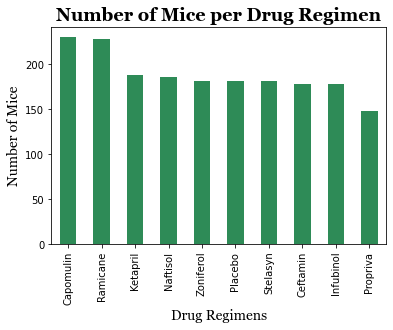

In [46]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

clean["Drug Regimen"].value_counts().plot(kind = "bar", color = "seagreen")

plt.title("Number of Mice per Drug Regimen",fontname="Georgia", fontsize=18, fontweight = "bold")
plt.xlabel("Drug Regimens",fontname="Georgia", fontsize=14)
plt.ylabel("Number of Mice",fontname="Georgia", fontsize=14)

plt.show()

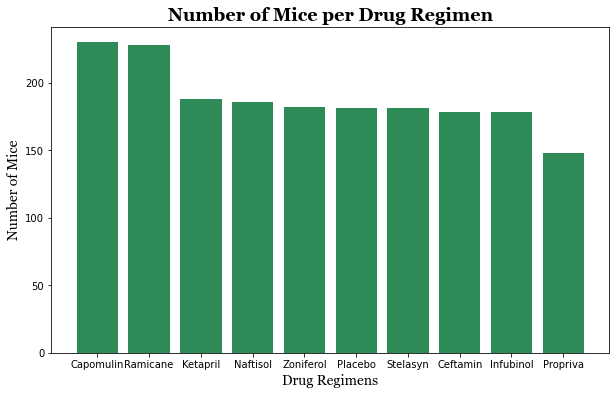

In [47]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

data = clean["Drug Regimen"].value_counts()

x = data.index
y = data.values

plt.figure(figsize=(10,6))
plt.bar(x, y, color="seagreen",alpha=1, align="center")
plt.title("Number of Mice per Drug Regimen",fontname="Georgia", fontsize=18, fontweight = "bold")
plt.xlabel("Drug Regimens",fontname="Georgia", fontsize=14)
plt.ylabel("Number of Mice",fontname="Georgia", fontsize=14)

plt.show()

Text(0.5, 1.0, 'Percent of Mice by Gender')

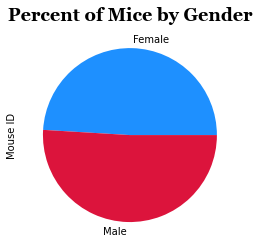

In [48]:
clean.groupby("Sex")["Mouse ID"].count().plot(kind="pie",colors = ["dodgerblue","crimson"])
plt.title("Percent of Mice by Gender",fontname="Georgia", fontsize=18, fontweight = "bold")

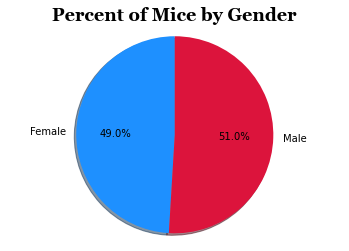

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = clean.groupby("Sex")["Mouse ID"].count()
gender = list(gender_data.index)
gender_count = list(gender_data.values)
colors = ["dodgerblue","crimson"]

plt.pie(gender_count, labels=gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Percent of Mice by Gender",fontname="Georgia", fontsize=18, fontweight = "bold")
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final = clean.merge(max_time, on=["Mouse ID", "Timepoint"])
final

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in regimens:
    drug_data = final.loc[final["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    quartiles = drug_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    tumor_vol.append(drug_data.values)

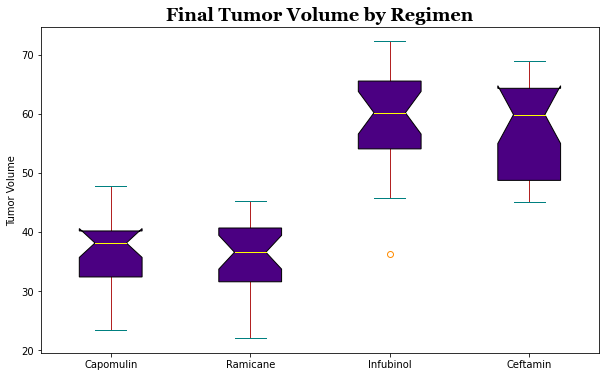

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,6))

plt.boxplot(tumor_vol, labels = regimens, notch="True", patch_artist=True,
            boxprops=dict(facecolor="indigo", color="black"),
            capprops=dict(color="teal"),
            whiskerprops=dict(color="firebrick"),
            flierprops=dict(markeredgecolor="darkorange"),
            medianprops=dict(color="yellow"),)

plt.title('Final Tumor Volume by Regimen',fontname="Georgia", fontsize=18, fontweight = "bold")
plt.ylabel('Tumor Volume')

plt.show()

## Line and Scatter Plots

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap = clean.loc[clean['Drug Regimen'] == "Capomulin"].reset_index(drop=True)
cap

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
225,m601,25,33.118756,1,Capomulin,Male,22,17
226,m601,30,31.758275,1,Capomulin,Male,22,17
227,m601,35,30.834357,1,Capomulin,Male,22,17
228,m601,40,31.378045,1,Capomulin,Male,22,17


In [54]:
mouse = clean.loc[clean['Mouse ID'] == "m601"].reset_index(drop=True)
mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,m601,0,45.000000,0,Capomulin,Male,22,17
1,m601,5,41.408591,1,Capomulin,Male,22,17
2,m601,10,36.825367,1,Capomulin,Male,22,17
3,m601,15,35.464612,1,Capomulin,Male,22,17
4,m601,20,34.255732,1,Capomulin,Male,22,17
5,m601,25,33.118756,1,Capomulin,Male,22,17
6,m601,30,31.758275,1,Capomulin,Male,22,17
7,m601,35,30.834357,1,Capomulin,Male,22,17
8,m601,40,31.378045,1,Capomulin,Male,22,17
9,m601,45,28.430964,1,Capomulin,Male,22,17


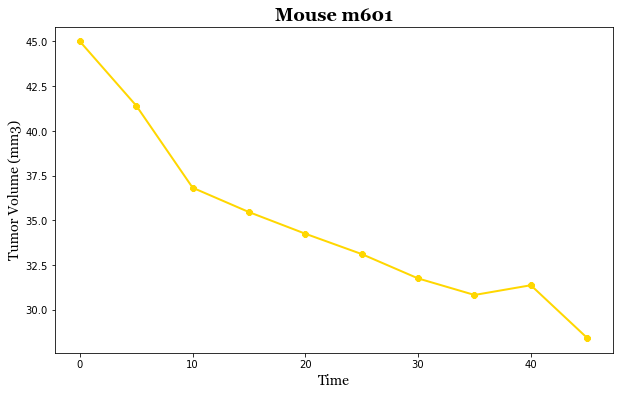

In [55]:
plt.figure(figsize=(10,6))

x = mouse.Timepoint
y = mouse["Tumor Volume (mm3)"]

plt.plot(x, y, color="gold",linewidth = 2, marker = "8")

plt.title("Mouse m601", fontsize=18, fontweight="bold", fontname="Georgia")
plt.xlabel('Time', fontsize=14, fontname="Georgia")
plt.ylabel("Tumor Volume (mm3)", fontsize=14, fontname="Georgia")

plt.show()

<ipython-input-56-186ace6bf078>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weight = clean.loc[clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


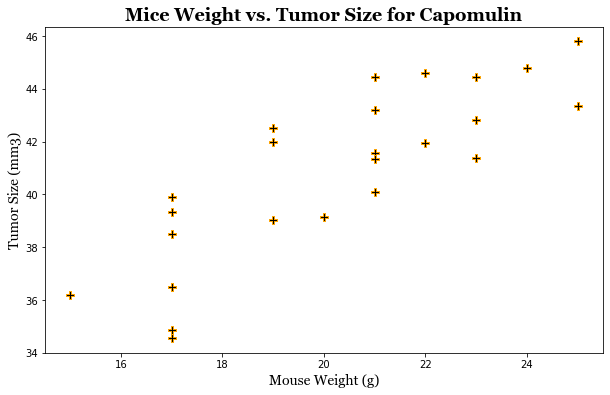

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = clean.loc[clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()
x = weight["Weight (g)"]
y = weight["Tumor Volume (mm3)"]
plt.figure(figsize=(10,6))

plt.scatter(x, y, marker="P", facecolors="black", edgecolors="orange", s=75)

plt.title("Mice Weight vs. Tumor Size for Capomulin", fontsize=18, fontweight="bold", fontname="Georgia")
plt.xlabel("Mouse Weight (g)", fontsize=14, fontname="Georgia")
plt.ylabel("Tumor Size (mm3)", fontsize=14, fontname="Georgia")

plt.show()

## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corrs = weight.corr()
corrs

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


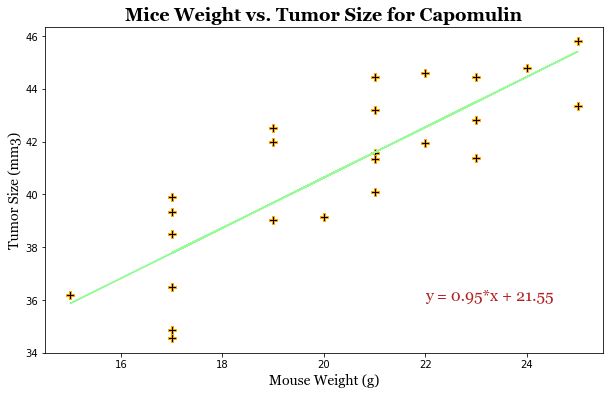

In [58]:
x = weight["Weight (g)"]
y = weight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)


regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "*x + " + str(round(intercept,2))
plt.figure(figsize=(10,6))

plt.scatter(x, y, marker="P", facecolors="black", edgecolors="orange", s=75)
plt.plot(x,regress_values, color="palegreen")
plt.annotate(line_eq,(22,36),fontsize=16,color="firebrick",fontname="Georgia")
plt.title("Mice Weight vs. Tumor Size for Capomulin", fontsize=18, fontweight="bold", fontname="Georgia")
plt.xlabel("Mouse Weight (g)", fontsize=14, fontname="Georgia")
plt.ylabel("Tumor Size (mm3)", fontsize=14, fontname="Georgia")

plt.show()